# Summary

Dans ce notebook, nous allons mettre en pratique les algorithmes de regression sur un jeu de données relatif aux prix de biens immobilliers à Ames, Iowa.

Pour rappel, voici **quelques étapes de travail** d'un **Data Scientist** sont les suivantes:

<img src=attachment:f51f71af-8592-414e-a490-2c6d3bbcfe46.png width=700>


**Outils:**
- **Collecte et exploration des données**: pandas, polar, missingno, ydata-profiling, seaborn, plotly, ...
- **Modélisaion**: lazypredict sklearn, xgboost, lightgbm, catboost, yellowbricks, ...
- **Optimisation des hyperparamètres**: gridsearch (sklearn), optuna, hyperopt, ...
- **Déploiement**: mlflow, fastapi, evidently, heroku, pythonanywhere, azure webapp, ...

# Sources utiles

- [Introduction à MLOps](https://ashutoshtripathi.com/2021/08/18/mlops-a-complete-guide-to-machine-learning-operations-mlops-vs-devops/)

- [MLFLOW - Site de référence](https://mlflow.org/docs/latest/index.html)
- [MLFLOW - Tutorial](https://mlflow.org/docs/latest/tutorials-and-examples/tutorial.html)
- [MLFLOW - Tracking](https://mlflow.org/docs/latest/tracking.html)
- [MLFLOW - Model Registry](https://mlflow.org/docs/latest/model-registry.html#)
- [MLFLOW - Serve a model](https://mlflow.org/docs/latest/model-registry.html#serving-an-mlflow-model-from-model-registry)

- [Evidently - tutorial d'analyse de Data drift](https://github.com/evidentlyai/evidently/tree/main/examples/sample_notebooks)
- [API Flask - Démarche de mise en oeuvre](http://web.univ-ubs.fr/lmba/lardjane/python/c4.pdf)
- [FastAPI - Démarche de mise en oeuvre](https://towardsdatascience.com/how-to-build-and-deploy-a-machine-learning-model-with-fastapi-64c505213857)
- [Azure - Tuto déploiement application web ](https://learn.microsoft.com/fr-fr/azure/app-service/quickstart-python?tabs=flask%2Cwindows%2Cazure-portal%2Cvscode-deploy%2Cdeploy-instructions-azportal%2Cterminal-bash%2Cdeploy-instructions-zip-azcli)
- [Tests unitaires - Unittest ou Pytest](https://www.sitepoint.com/python-unit-testing-unittest-pytest/)

- [Pythonanywhere](https://www.pythonanywhere.com/)
- [Heroku](https://www.heroku.com/)
-[Azure webapp - Déploiement automatisé via Github](https://learn.microsoft.com/fr-fr/azure/app-service/deploy-continuous-deployment?tabs=github)
- Streamlit ou gradio pour la mise en place d'un dashbord


In [12]:
!pip install dill matplotlib missingno pandas seaborn optuna plotly pendulum loguru yellowbrick ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 1.1 MB/s eta 0:00:001.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 5.4 MB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 4.4 MB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 4.4 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.2 MB/s eta 0:00:005.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.1/473.1 kB 3.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 4.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.4 MB/s eta 0:00:00m

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 2.3 MB/s eta 0:00:004.4 MB/s eta 0:00:01
  DEPRECATION: htmlmin is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for htmlmin ... done
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


# Librairies

In [2]:
# reload modules before executing user code.
#%reload_ext autoreload
#%autoreload 2

import sys
from pathlib import Path
import dill
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import optuna
import pandas as pd
import plotly.express as px
import pendulum
import seaborn as sns
from loguru import logger
from sklearn import set_config
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             max_error,
                            )
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot


sys.path.append(str(Path.cwd().parent))
from settings.params import (DATA_DIR_INPUT,
                             DATA_DIR_OUTPUT,
                             MODEL_PARAMS,
                             REPORT_DIR,
                             TIMEZONE,
                            )
from src.make_dataset import load_data


set_config(display="diagram", print_changed_only=False)
pd.set_option("display.max_columns", None)

/home/dosecurity/Desktop/notebooks/notebookEnv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Settings

In [3]:
# time in UTC
log_fmt = ("<green>{time:YYYY-MM-DD HH:mm:ss.SSS!UTC}</green> | <level>{level: <8}</level> | "
           "<cyan>{name}</cyan>:<cyan>{function}</cyan>:<cyan>{line}</cyan> - {message}"
          )
log_config = {
    "handlers": [
        {"sink": sys.stderr, "format": log_fmt},
    ],
}
logger.configure(**log_config)


[1]

In [4]:
EXECUTION_DATE = pendulum.now(tz=TIMEZONE)

logger.info(f"Execution date: {EXECUTION_DATE}")

logger.info(f"\nData input directory : {DATA_DIR_INPUT}\nData output directory: {DATA_DIR_OUTPUT}")


# model parameters
FEATURES = MODEL_PARAMS.get("FEATURES")
TARGET_NAME = MODEL_PARAMS["TARGET"]

2023-08-12 17:37:20.941 | INFO     | __main__:<module>:3 - Execution date: 2023-08-12T17:37:20.941165+00:00
2023-08-12 17:37:20.944 | INFO     | __main__:<module>:5 - 
Data input directory : /home/dosecurity/Desktop/PythonProjects/ProjectFolder/mlops-project-dic3/data/input
Data output directory: /home/dosecurity/Desktop/PythonProjects/ProjectFolder/mlops-project-dic3/data/output


# Data Collection

In [5]:
data = pd.read_csv(str(DATA_DIR_INPUT) + "/train.csv.zip")

In [19]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [21]:
data.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

### variables quantitatives

In [26]:
data.describe(include="int")

,Id,P1,P5,P6,P7,P8,P9,P10,P11,P12,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P30,P31,P32,P33,P34,P35,P36,P37
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,68.000000,4.014599,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788
std,39.692569,2.910391,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.000000,3.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.000000,4.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,136.000000,12.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000


### variables catégorielles

In [25]:
data.describe(include="object")

,Open Date,City,City Group,Type
count,137,137,137,137
unique,134,34,2,3
top,02/23/2010,İstanbul,Big Cities,FC
freq,2,50,78,76


### features data

In [7]:
data_features = data[MODEL_PARAMS['FEATURES']]

In [8]:
data_features

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0


# EDA: Exploratory Data Analysis

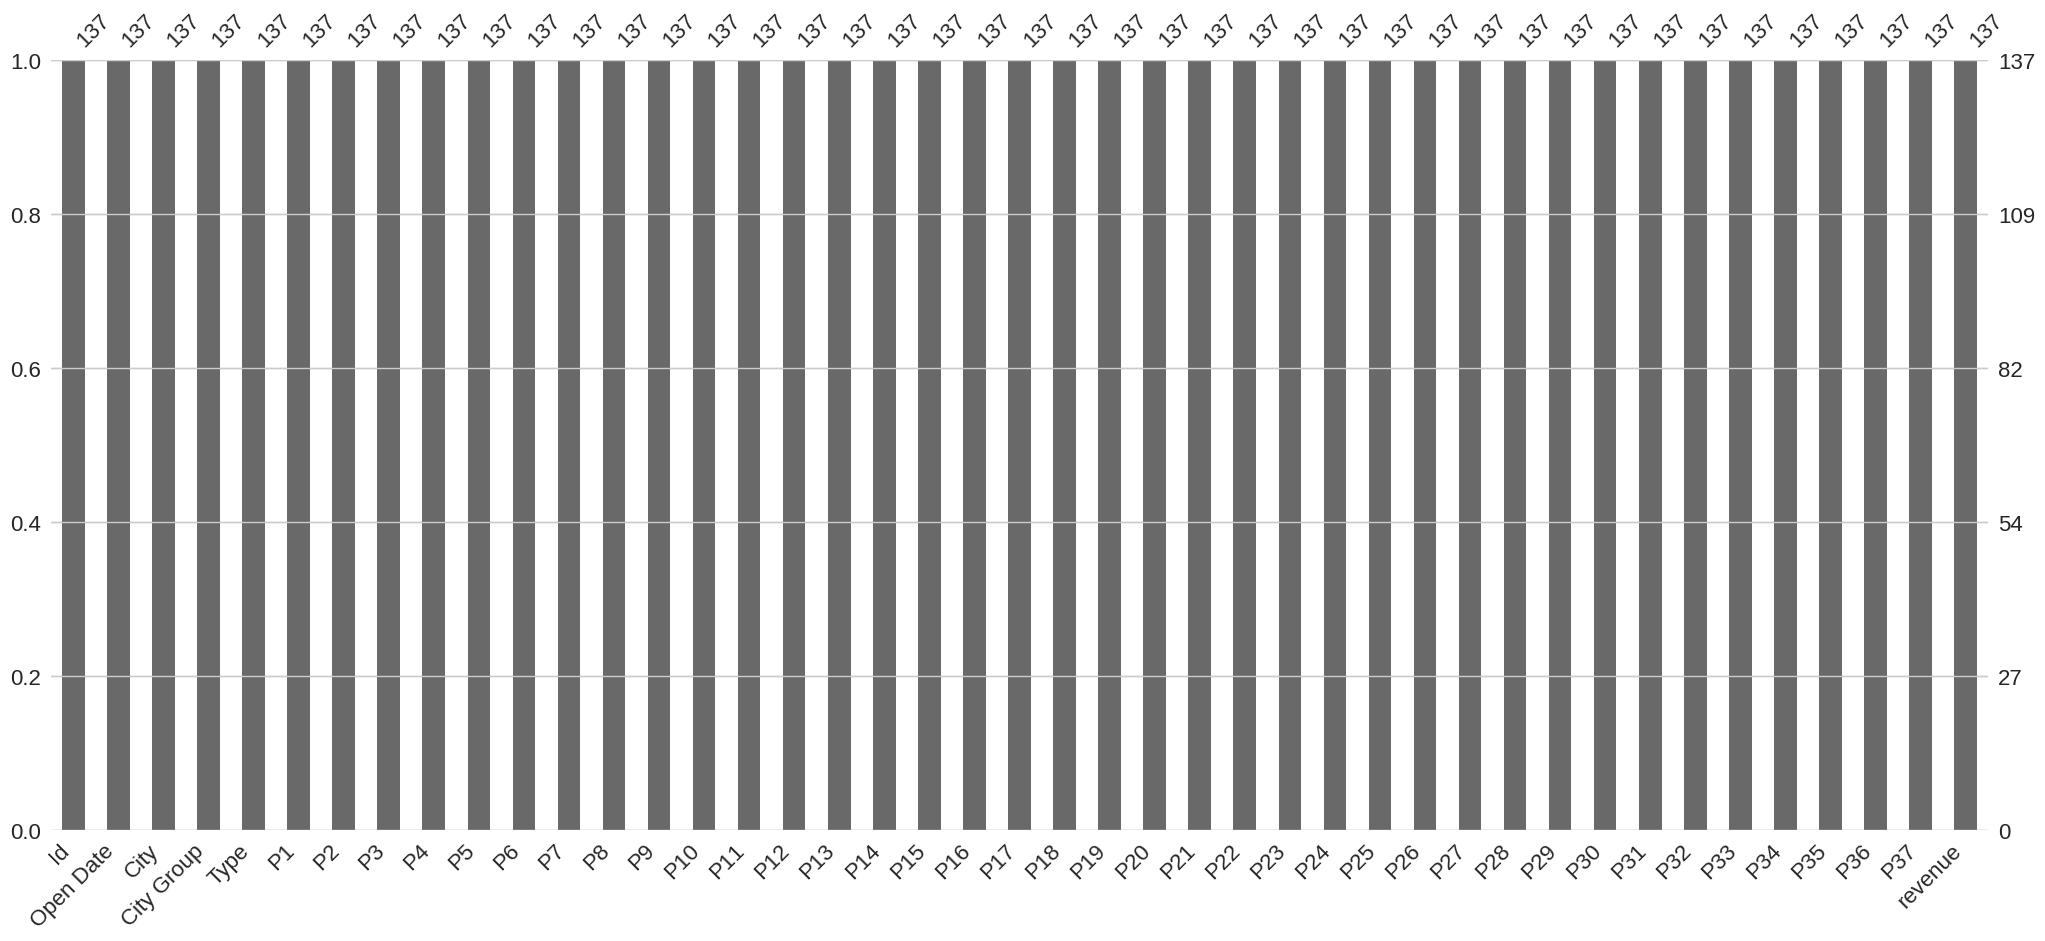

In [24]:
msno.bar(data,
         filter="top" # filter columns with % of missing values > 50%
        );

In [140]:
# Target: stat description
data[TARGET_NAME].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

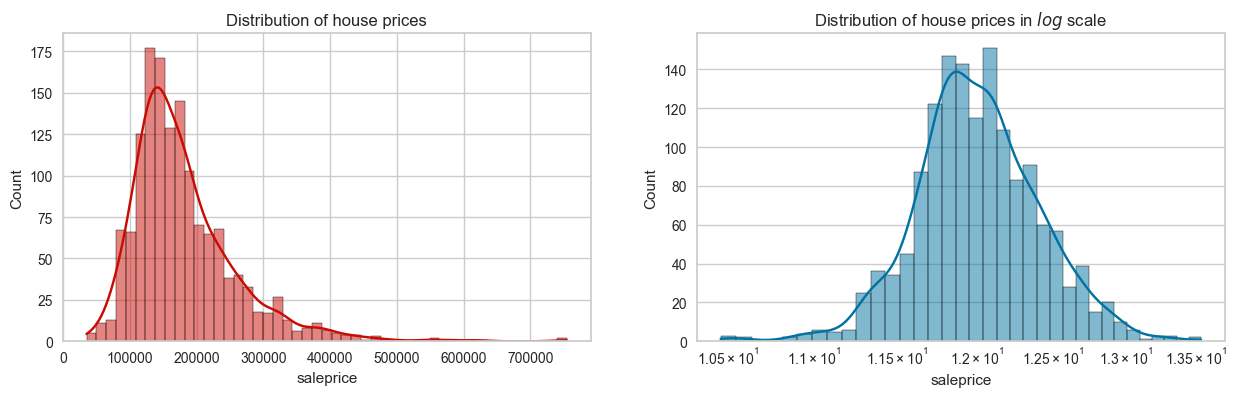

In [141]:
# Target distribution: raw vs log (box-cox transformation)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(data[TARGET_NAME], color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution of house prices')

sns.histplot(np.log(data[TARGET_NAME]), color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution of house prices in $log$ scale')
axes[1].set_xscale('log');

**Features**:
- 'bsmtfinsf1': 
- 'bsmtunfsf': 
- 'condition2': 
- 'exterqual': 
- 'foundation': 
- 'garagecars': 
- 'garagetype': 
- 'heating': 
- 'heatingqc': 
- 'housestyle': 
- 'lotarea': 
- 'masvnrarea': 
- 'masvnrtype': 
- 'miscfeature': 
- 'mosold': 
- 'mssubclass':
- 'mszoning'
- 'overallqual': 
- 'street': 
- 'totalbsmtsf'
- 'yearremodadd'
- 'yrsold'
- 'mosold',  # Month Sold (MM)
- "yearbuilt",  # Original construction date
- "yearremodadd",  # Remodel date (same as construction date if no remodeling or additions)|
- 'yrsold',  # Year Sold (YYYY)

**Target**: "saleprice"

Pretraitement des donnees de type date et ajout des nouvelles colonnes dans le dataset

Identifier les 'CategoricalFeatures' et les 'NumericalFeatures'

In [142]:
categorical_features = data.select_dtypes(include=["object", "bool"]).columns
logger.info(f"Categorical features:\n {categorical_features}\n")

numerical_features = data.select_dtypes(include="number").columns
logger.info(f"Numerical features:\n {numerical_features}")

2023-07-19 15:38:24.629 | INFO     | __main__:<module>:2 - Categorical features:
 Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

2023-07-19 15:38:24.634 | INFO     | __main__:<module>:5 - Numerical features:
 Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsm

ncols = 2  # number of columns in subplot
nrows = sum(divmod(len(categorical_features), ncols))  # number of rows
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 30))
axes = axes.ravel()

for i, col_name in enumerate(categorical_features):
    ax = axes[i]
    sns.violinplot(x=col_name, y=TARGET_NAME, data=data, palette='husl', ax=ax)

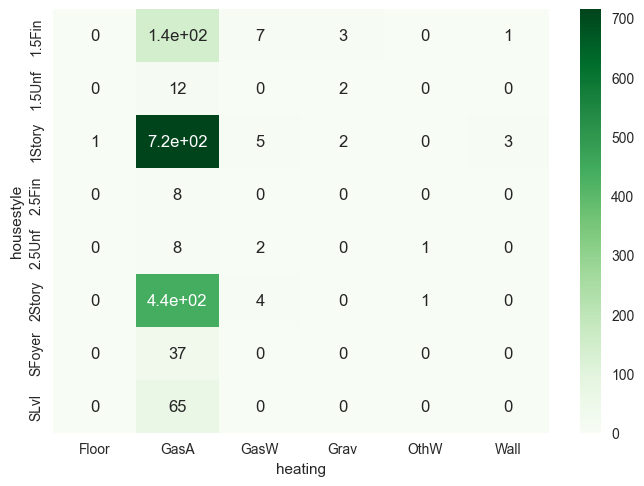

In [143]:
sns.heatmap(pd.crosstab(index=data.housestyle, columns=data.heating,
                        margins=False,
                        margins_name="Total", dropna=False),
            cmap="Greens", 
            annot=True,
            fmt='.2g',
           );  # px pour un graph interactif

In [144]:
!pip install ipykernel


In [145]:
!pip install --upgrade nbformat


In [146]:
!pip3 install --upgrade pip

In [147]:
#px.box(data_frame=data, x="heating", y=TARGET_NAME)

In [148]:
"""px.box(data_frame=data, y=TARGET_NAME,
       x="housestyle", color="heating",
       title="Box plot",
       #hover_data=[Heating"],
       boxmode="group",
       #notched=True, # used notched shape
       points=None,
       width=900,
       height=500,
      )
      """

'px.box(data_frame=data, y=TARGET_NAME,\n       x="housestyle", color="heating",\n       title="Box plot",\n       #hover_data=[Heating"],\n       boxmode="group",\n       #notched=True, # used notched shape\n       points=None,\n       width=900,\n       height=500,\n      )\n      '

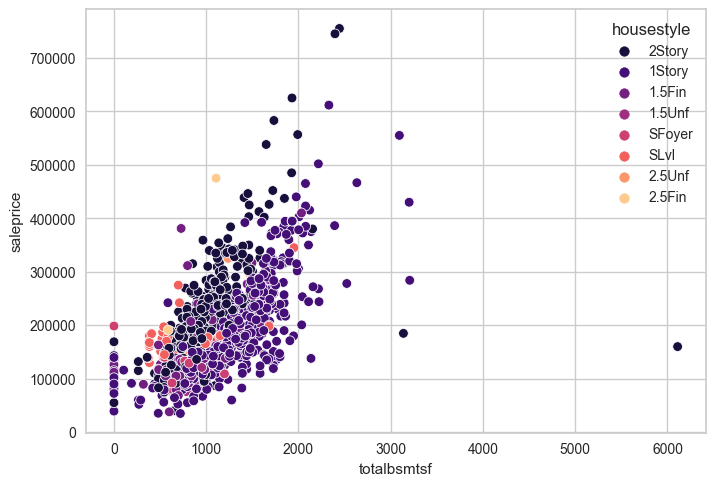

In [149]:
sns.scatterplot(x='totalbsmtsf', y=TARGET_NAME, data=data, palette='magma', hue='housestyle',);

In [150]:
Path(REPORT_DIR).mkdir(parents=True, exist_ok=True)

profile = ProfileReport(data, title="House price - profiling")
# profile.to_notebook_iframe()
profile.to_file(Path(REPORT_DIR, 'profiling_report.html'))

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


# Feature engineering / selections

# Critères de filtrage: Tp créer une fonction de preprocessng des données (suppresion des variables non pertinentes du point de vu Business/Stats)

# variables qualitatives
- 1 seule modalité (voire 1 modalité et des valeurs nulles)

# Variables quantitatives:
- valeur unique

Creation de la fonction de preprocessing pour les variables qualitatives avec 1 modalite et les variables quantitatives avec une valeur unique

In [160]:
def filter_features(dataset:pd.DataFrame):
    for feature in dataset.columns:
        if dataset[feature].nunique() == 1:
            dataset.drop(feature, inplace=True)
    return dataset

Fonction pour filtrer les features suivant le MIN_COMP_RATE est defini dans le utils.py

In [161]:
def filtre_min_completion_rate(dataset:pd.DataFrame, min_completion_rate: float):

    # Calculer le taux de valeurs manquantes dans chaque colonne
    missing_rates = dataset.isna().mean()
    # Filtrer les colonnes qui n'atteignent pas le taux minimal de complétion
    filtered_cols = missing_rates[missing_rates < min_completion_rate].index
    
    return dataset[filtered_cols]


Applications des fonctions de preprocessing 

In [162]:
data = data.assign(building_age=lambda dfr: dfr.yrsold - dfr.yearbuilt,
                   remodel_age=lambda dfr: dfr.yrsold - dfr.yearremodadd
                  )
data.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,building_age,remodel_age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7,6
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,36
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8,8


In [155]:
data.loc[:, ["yrsold", "mosold", "yearbuilt", "yearremodadd"]]

,yrsold,mosold,yearbuilt,yearremodadd
0,2008,2,2003,2003
1,2007,5,1976,1976
2,2008,9,2001,2002
3,2006,2,1915,1970
4,2008,12,2000,2000
...,...,...,...,...
1455,2007,8,1999,2000
1456,2010,2,1978,1988
1457,2010,5,1941,2006
1458,2010,4,1950,1996


In [156]:
data.yearbuilt.value_counts().head(10)#plot(kind="bar", figsize=(15, 7));

yearbuilt
2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
Name: count, dtype: int64

Traitement des dates et ajout des nouvelles colonnes dans le dataset

In [163]:
data_first_preprocessing = filter_features(data[FEATURES])
data_second_preprocessing = filtre_min_completion_rate(data_first_preprocessing, MODEL_PARAMS["MIN_COMPLETION_RATE"])
data_second_preprocessing

,bsmtfinsf1,bsmtunfsf,condition2,exterqual,foundation,garagecars,garagetype,heating,heatingqc,housestyle,lotarea,masvnrarea,masvnrtype,mssubclass,overallqual,saletype,street,totalbsmtsf,building_age,remodel_age
0,706,150,Norm,Gd,PConc,2,Attchd,GasA,Ex,2Story,8450,196.0,BrkFace,60,7,WD,Pave,856,5,5
1,978,284,Norm,TA,CBlock,2,Attchd,GasA,Ex,1Story,9600,0.0,None,20,6,WD,Pave,1262,31,31
2,486,434,Norm,Gd,PConc,2,Attchd,GasA,Ex,2Story,11250,162.0,BrkFace,60,7,WD,Pave,920,7,6
3,216,540,Norm,TA,BrkTil,3,Detchd,GasA,Gd,2Story,9550,0.0,None,70,7,WD,Pave,756,91,36
4,655,490,Norm,Gd,PConc,3,Attchd,GasA,Ex,2Story,14260,350.0,BrkFace,60,8,WD,Pave,1145,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,953,Norm,TA,PConc,2,Attchd,GasA,Ex,2Story,7917,0.0,None,60,6,WD,Pave,953,8,7
1456,790,589,Norm,TA,CBlock,2,Attchd,GasA,TA,1Story,13175,119.0,Stone,20,6,WD,Pave,1542,32,22
1457,275,877,Norm,Ex,Stone,1,Attchd,GasA,Ex,2Story,9042,0.0,None,70,7,WD,Pave,1152,69,4
1458,49,0,Norm,TA,CBlock,1,Attchd,GasA,Gd,1Story,9717,0.0,None,20,5,WD,Pave,1078,60,14


Suppression de la variable salecondition

In [171]:
print(MODEL_PARAMS)

{'MIN_COMPLETION_RATE': 0.5, 'FEATURES': ['bsmtfinsf1', 'bsmtunfsf', 'condition2', 'exterqual', 'foundation', 'garagecars', 'garagetype', 'heating', 'heatingqc', 'housestyle', 'lotarea', 'masvnrarea', 'masvnrtype', 'miscfeature', 'mssubclass', 'overallqual', 'saletype', 'street', 'totalbsmtsf', 'building_age', 'remodel_age'], 'TARGET': 'saleprice', 'DATA_LEAKAGE_COLUMNS': ['salecondition']}


In [177]:
for column_name in MODEL_PARAMS["DATA_LEAKAGE_COLUMNS"]:
    if column_name in data_second_preprocessing.columns:
        datas = data_second_preprocessing.drop(column_name, axis=1, inplace=True)
    else:
        datas = data_second_preprocessing

In [178]:
datas

,bsmtfinsf1,bsmtunfsf,condition2,exterqual,foundation,garagecars,garagetype,heating,heatingqc,housestyle,lotarea,masvnrarea,masvnrtype,mssubclass,overallqual,saletype,street,totalbsmtsf,building_age,remodel_age
0,706,150,Norm,Gd,PConc,2,Attchd,GasA,Ex,2Story,8450,196.0,BrkFace,60,7,WD,Pave,856,5,5
1,978,284,Norm,TA,CBlock,2,Attchd,GasA,Ex,1Story,9600,0.0,None,20,6,WD,Pave,1262,31,31
2,486,434,Norm,Gd,PConc,2,Attchd,GasA,Ex,2Story,11250,162.0,BrkFace,60,7,WD,Pave,920,7,6
3,216,540,Norm,TA,BrkTil,3,Detchd,GasA,Gd,2Story,9550,0.0,None,70,7,WD,Pave,756,91,36
4,655,490,Norm,Gd,PConc,3,Attchd,GasA,Ex,2Story,14260,350.0,BrkFace,60,8,WD,Pave,1145,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,953,Norm,TA,PConc,2,Attchd,GasA,Ex,2Story,7917,0.0,None,60,6,WD,Pave,953,8,7
1456,790,589,Norm,TA,CBlock,2,Attchd,GasA,TA,1Story,13175,119.0,Stone,20,6,WD,Pave,1542,32,22
1457,275,877,Norm,Ex,Stone,1,Attchd,GasA,Ex,2Story,9042,0.0,None,70,7,WD,Pave,1152,69,4
1458,49,0,Norm,TA,CBlock,1,Attchd,GasA,Gd,1Story,9717,0.0,None,20,5,WD,Pave,1078,60,14


Recuperons les variables categorical et numerical des donnees traitees

In [181]:
categorical_features = datas.select_dtypes(include=["object", "bool"]).columns
logger.info(f"Categorical features:\n {categorical_features}\n")

numerical_features = datas.select_dtypes(include="number").columns
logger.info(f"Numerical features:\n {numerical_features}")

2023-07-19 16:11:27.738 | INFO     | __main__:<module>:2 - Categorical features:
 Index(['condition2', 'exterqual', 'foundation', 'garagetype', 'heating',
       'heatingqc', 'housestyle', 'masvnrtype', 'saletype', 'street'],
      dtype='object')

2023-07-19 16:11:27.746 | INFO     | __main__:<module>:5 - Numerical features:
 Index(['bsmtfinsf1', 'bsmtunfsf', 'garagecars', 'lotarea', 'masvnrarea',
       'mssubclass', 'overallqual', 'totalbsmtsf', 'building_age',
       'remodel_age'],
      dtype='object')


# Modeling

# Modèles à tester:
Dummy, linéaire, ensembliste (en partant du plus simple au plus complexe)


# Tracking avec mlflow

In [232]:
linear = LinearRegression()
dummy_model = DummyRegressor(strategy="mean")
random_forest = RandomForestRegressor(n_estimators=100, max_depth=5)
adaboost = AdaBoostRegressor(n_estimators=100)
voting = VotingRegressor(estimators=[("lr", linear), ("rf", random_forest)],weights=[0.5, 0.5])

modeles_definis = [linear, dummy_model, random_forest, adaboost, voting]
modeles_names = ["linear", "dummy_model", "random_forest", "adaboost", "voting"]

## Pipeline

In [179]:
def define_pipeline(numeric_transformer,
                   categorical_transformer,
                   estimator,
                   **kwargs):
     steps = [
        ('numeric_preprocessing', numeric_transformer),
        ('categorical_preprocessing', categorical_transformer),
        ('estimator', estimator)
    ]
    
    # Create the pipeline
     pipeline = Pipeline(steps, **kwargs)
    
     return pipeline

In [212]:
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                      ("scaler", StandardScaler())]
                              )

categorical_transformer = make_pipeline(*[SimpleImputer(strategy="constant", fill_value="undefined"),
                                          OneHotEncoder(handle_unknown="ignore")]
                                       )


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)
reg

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(cop...
                                                                                 sparse='deprecated',
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  Index(['condition2', 'exterqual', 'foundation', 'garagetype', 'heating',
       'heatingqc', 'housestyle', 'masvnrtype', 'saletype', 'street'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  positive=False))],
         verbose=False)

Definition d'une fonction pour rendre la Pipeline plus generique avec les modeles utilises

In [233]:
def define_pipeline(model_name):
    reg = Pipeline(
        steps=[("preprocessor", preprocessor), ("regressor", model_name)]
    )
    return reg

Appliquer le pipeline a l'ensemble des modeles

In [ ]:
modeles = {name:define_pipeline(model) for name,model in zip(modeles_names, modeles_definis)}
modeles

## Train / test split

In [183]:
datas

,bsmtfinsf1,bsmtunfsf,condition2,exterqual,foundation,garagecars,garagetype,heating,heatingqc,housestyle,lotarea,masvnrarea,masvnrtype,mssubclass,overallqual,saletype,street,totalbsmtsf,building_age,remodel_age
0,706,150,Norm,Gd,PConc,2,Attchd,GasA,Ex,2Story,8450,196.0,BrkFace,60,7,WD,Pave,856,5,5
1,978,284,Norm,TA,CBlock,2,Attchd,GasA,Ex,1Story,9600,0.0,None,20,6,WD,Pave,1262,31,31
2,486,434,Norm,Gd,PConc,2,Attchd,GasA,Ex,2Story,11250,162.0,BrkFace,60,7,WD,Pave,920,7,6
3,216,540,Norm,TA,BrkTil,3,Detchd,GasA,Gd,2Story,9550,0.0,None,70,7,WD,Pave,756,91,36
4,655,490,Norm,Gd,PConc,3,Attchd,GasA,Ex,2Story,14260,350.0,BrkFace,60,8,WD,Pave,1145,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,953,Norm,TA,PConc,2,Attchd,GasA,Ex,2Story,7917,0.0,None,60,6,WD,Pave,953,8,7
1456,790,589,Norm,TA,CBlock,2,Attchd,GasA,TA,1Story,13175,119.0,Stone,20,6,WD,Pave,1542,32,22
1457,275,877,Norm,Ex,Stone,1,Attchd,GasA,Ex,2Story,9042,0.0,None,70,7,WD,Pave,1152,69,4
1458,49,0,Norm,TA,CBlock,1,Attchd,GasA,Gd,1Story,9717,0.0,None,20,5,WD,Pave,1078,60,14


In [185]:
x_train, x_test, y_train, y_test = train_test_split(datas,
                                                    data[TARGET_NAME],
                                                    test_size=MODEL_PARAMS["TEST_SIZE"],
                                                    random_state=23)
logger.info(f"\nX train: {x_train.shape}\nY train: {y_train.shape}\n"
            f"X test: {x_test.shape}\nY test: {y_test.shape}")

2023-07-19 16:44:27.171 | INFO     | __main__:<module>:5 - 
X train: (1022, 20)
Y train: (1022,)
X test: (438, 20)
Y test: (438,)


## Baseline

### Training

In [189]:
# pycaret
# lazy_predict

reg.fit(x_train,y_train)
# 5 modèles
# Expérimentation des modèles à stocker et suivre avec MLFlow

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(cop...
                                                                                 sparse='deprecated',
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  Index(['condition2', 'exterqual', 'foundation', 'garagetype', 'heating',
       'heatingqc', 'housestyle', 'masvnrtype', 'saletype', 'street'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  positive=False))],
         verbose=False)

Utilisation de Pycart

In [240]:
!pip3 install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/f5/4b/2002980b046ac396618dfc152d384b812a78182b776ca77fe0ae5f80deac/pycaret-3.0.4-py3-none-any.whl.metadata
  Using cached pycaret-3.0.4-py3-none-any.whl.metadata (17 kB)
  Obtaining dependency information for ipywidgets>=7.6.5 from https://files.pythonhosted.org/packages/a3/af/9d5f256025100b578b11d7280e76fda349255666f752b618a613785cb58d/ipywidgets-8.0.7-py3-none-any.whl.metadata
  Using cached ipywidgets-8.0.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached pandas-1.5.3-cp311-cp311-macosx_10_9_x86_64.whl (11.9 MB)
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl (9.0 MB)
  Using cached pyod-1.1.0.tar.gz (153 kB)
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for imbalanced-learn>=0.8.1 from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata


In [ ]:
from pycaret.regression import *


PROBLEME D'INSTALLATION DE PYCARET

Utilisation de MlFlow

In [ ]:
!pip3 install mlflow

In [254]:
import mlflow

modeles_mse = {}
for model_name, model in modeles.items():
    with mlflow.start_run(run_name=model_name):
        print(model_name)
        # Train the model
        model.fit(x_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(x_test)

        # Calculate the mean squared error
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        modeles_mse[model_name] = [mse, model]
        
        score= model.score(x_test, y_test)

        # Log model parameters, metrics, and artifacts with MLflow
        mlflow.log_param("model", model_name)
        mlflow.log_param("n_estimators", getattr(model, 'n_estimators', 'N/A'))
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("r2", r2)
        mlflow.sklearn.log_model(model, "model")
        logger.info("R2")
        logger.info(r2)
        logger.info("MSE")
        logger.info(mse)
        logger.info("SCORE")
        logger.info(score)


linear


2023-07-19 22:29:17.652 | INFO     | __main__:<module>:26 - R2
2023-07-19 22:29:17.660 | INFO     | __main__:<module>:27 - 0.8268198076368634
2023-07-19 22:29:17.665 | INFO     | __main__:<module>:28 - MSE
2023-07-19 22:29:17.669 | INFO     | __main__:<module>:29 - 1033278938.166954
2023-07-19 22:29:17.670 | INFO     | __main__:<module>:30 - SCORE
2023-07-19 22:29:17.672 | INFO     | __main__:<module>:31 - 0.8268198076368634


dummy_model


2023-07-19 22:29:21.036 | INFO     | __main__:<module>:26 - R2
2023-07-19 22:29:21.038 | INFO     | __main__:<module>:27 - -6.4535428070389145e-06
2023-07-19 22:29:21.040 | INFO     | __main__:<module>:28 - MSE
2023-07-19 22:29:21.041 | INFO     | __main__:<module>:29 - 5966534580.988027
2023-07-19 22:29:21.043 | INFO     | __main__:<module>:30 - SCORE
2023-07-19 22:29:21.046 | INFO     | __main__:<module>:31 - -6.4535428070389145e-06


random_forest


2023-07-19 22:29:25.030 | INFO     | __main__:<module>:26 - R2
2023-07-19 22:29:25.032 | INFO     | __main__:<module>:27 - 0.8019167936022463
2023-07-19 22:29:25.033 | INFO     | __main__:<module>:28 - MSE
2023-07-19 22:29:25.036 | INFO     | __main__:<module>:29 - 1181862673.6838295
2023-07-19 22:29:25.038 | INFO     | __main__:<module>:30 - SCORE
2023-07-19 22:29:25.041 | INFO     | __main__:<module>:31 - 0.8019167936022463


adaboost


2023-07-19 22:29:28.766 | INFO     | __main__:<module>:26 - R2
2023-07-19 22:29:28.768 | INFO     | __main__:<module>:27 - 0.7448274705888338
2023-07-19 22:29:28.770 | INFO     | __main__:<module>:28 - MSE
2023-07-19 22:29:28.771 | INFO     | __main__:<module>:29 - 1522485895.4220088
2023-07-19 22:29:28.773 | INFO     | __main__:<module>:30 - SCORE
2023-07-19 22:29:28.774 | INFO     | __main__:<module>:31 - 0.7448274705888338


voting


2023-07-19 22:29:32.790 | INFO     | __main__:<module>:26 - R2
2023-07-19 22:29:32.792 | INFO     | __main__:<module>:27 - 0.8422256113476274
2023-07-19 22:29:32.795 | INFO     | __main__:<module>:28 - MSE
2023-07-19 22:29:32.796 | INFO     | __main__:<module>:29 - 941360270.7798221
2023-07-19 22:29:32.798 | INFO     | __main__:<module>:30 - SCORE
2023-07-19 22:29:32.800 | INFO     | __main__:<module>:31 - 0.8422256113476274


### Model évaluation

# Définir les métriques d'évaluation que vous souhaitez utiliser
Les metriques:
MSE
R2
SCORE

Meilleur modele

In [255]:
mse_min = min(modeles_mse.values())
value = {i for i in modeles_mse.keys() if modeles_mse[i]==mse_min}
value

{'voting'}

Donc le meilleur modele est celui du VotingRegressor

In [257]:
best_model = modeles_mse["voting"][1]
best_model

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(cop...
                                                                    ccp_alpha=0.0,
                                                                    criterion='squared_error',
                                                                    max_depth=5,
                                                                    max_features=1.0,
                                                                    max_leaf_nodes=None,
                                                                    max_samples=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_samples_leaf=1,
                                                                    min_samples_split=2,
                                                                    min_weight_fraction_leaf=0.0,
                                                                    n_estimators=100,
                                                                    n_jobs=None,
                                                                    oob_score=False,
                                                                    random_state=None,
                                                                    verbose=0,
                                                                    warm_start=False))],
                                 n_jobs=None, verbose=False,
                                 weights=[0.5, 0.5]))],
         verbose=False)

Recuperation du model de voting

## Tuning

In [ ]:
# optuna
# hyperopt
# GridSearch (sklearn)


# Model analysis & validation

## Performance analysis

In [249]:
!pip3 install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 422.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for scikit-image>=0.12 from https://files.pythonhosted.org/packages/08/53/f28cfb52248665b42db7e45a36ffc3a304fef46b308e5065fe2046e78daf/scikit_image-0.21.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for imageio>=2.27 from https://files.pythonhosted.org/packages/c7/b0/7b6c35b8636ed773325cdb6f5ac3cd36afba63d99e20ed59c521cf5018b4/imageio-2.31.1-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/2d/e5/cc8a8ca43685006bb3ca56fab60707f3f74700844b18634db0b1e8b4b93f/tifffile-2023.7.18-py3-none-any.whl.metadata
  Obtaining dependency information for lazy_loader>=0.2 from https://files.pythonhosted.org/packages/a1/c3/65b3814e155836acacf720e5be3b5757130346670ac454fee29d3eda1381/lazy_loader-0.3-py3-none-any.whl.metadata
   

In [ ]:
# features importances (globale ou locale): shap, lime

## Business performances

## Data drift

In [ ]:
# evidently

# Déploiement

In [265]:
# sauvargade du modèle en local: dill, joblib (sklearn), pickle
#Sauvegarde de modele en utilisant dill

dill.dump(best_model, open("../models/best_model.pkl", "wb"))